# Script para evalur el proceso de clasificar las imagenes satelitales en Python

In [1]:
# Import librerias

import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
import geopandas as gpd
import folium 
import numpy as np

In [6]:
# Cargar datos
sitios = pd.read_csv(r'C:\Users\CRISTIAN\OneDrive - Universidad de Alcala\Classificaciones\sitios_entrenamiento_2021_lingue_reflex.csv', encoding = 'ISO-8859-1', index_col = [0], sep = ",")



In [20]:
sitios.isna().sum()

categoria     585
descrpcion    675
id_clase        0
geometry        0
B1              0
B2              0
B3              0
B4              0
B5              0
B6              0
B7              0
dtype: int64

In [19]:
## Borrar los na
sitios = sitios.dropna(subset=['id_clase'])
sitios

,categoria,descrpcion,id_clase,geometry,B1,B2,B3,B4,B5,B6,B7
0,Plantacion,NaN,1.0,POINT (-73.11308347500469 -39.42803928687321),0.002125,0.004902,0.012630,0.007047,0.196165,0.039470,0.014692
1,Plantacion,NaN,1.0,POINT (-73.11296129010525 -39.428205109236735),0.003142,0.005123,0.012795,0.006800,0.217505,0.042550,0.015105
2,Plantacion,NaN,1.0,POINT (-73.1127431027848 -39.428205109236735),0.003142,0.005123,0.012795,0.006800,0.217505,0.042550,0.015105
3,Plantacion,NaN,1.0,POINT (-73.11281510460056 -39.42782873610897),0.002785,0.004655,0.012822,0.007212,0.198447,0.041725,0.015352
4,Plantacion,NaN,1.0,POINT (-73.1129874725837 -39.42774255211741),0.002785,0.004655,0.012822,0.007212,0.198447,0.041725,0.015352
...,...,...,...,...,...,...,...,...,...,...,...
684,NaN,NaN,6.0,POINT (-73.15821942536273 -39.451965724074356),0.004985,0.007240,0.016425,0.008587,0.010320,0.006112,0.004573
685,NaN,NaN,6.0,POINT (-73.14340176972097 -39.45305711564692),0.009000,0.010815,0.018570,0.013593,0.073542,0.032238,0.020303
686,NaN,NaN,6.0,POINT (-73.20807053264092 -39.44553718808514),-0.002907,0.003857,0.017717,0.011365,0.007075,0.008807,0.008313
687,NaN,NaN,6.0,POINT (-73.18515348804354 -39.447118725573525),0.002097,0.007625,0.020880,0.012960,0.009825,0.007240,0.005535


# Exploratory analysis

In [22]:
sitios_num = sitios.iloc[:,4:]
sitios_num.describe()

,B1,B2,B3,B4,B5,B6,B7
count,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000
mean,0.019665,0.024941,0.045610,0.041384,0.248782,0.127314,0.070230
std,0.024130,0.028345,0.037500,0.045536,0.107451,0.099853,0.069356
min,-0.004819,-0.001698,0.005233,0.002400,0.005356,0.003954,0.003541
25%,0.003032,0.005136,0.013207,0.008003,0.182099,0.040267,0.015346
50%,0.009247,0.012259,0.029721,0.017388,0.243809,0.082672,0.034300
75%,0.027205,0.033124,0.069830,0.059270,0.316422,0.217010,0.112544
max,0.162629,0.193222,0.234500,0.258012,0.590955,0.398757,0.284220


In [24]:
# contar el numero de NA por columna
sitios.isna().sum()

categoria     585
descrpcion    675
id_clase        0
geometry        0
B1              0
B2              0
B3              0
B4              0
B5              0
B6              0
B7              0
dtype: int64

In [25]:
# Ahora queremos el valor medio por grupo
sitios_gr = sitios.loc[:,['id_clase','B1','B2','B3','B4','B5','B6','B7']]
sitios_gr


,id_clase,B1,B2,B3,B4,B5,B6,B7
0,1.0,0.002125,0.004902,0.012630,0.007047,0.196165,0.039470,0.014692
1,1.0,0.003142,0.005123,0.012795,0.006800,0.217505,0.042550,0.015105
2,1.0,0.003142,0.005123,0.012795,0.006800,0.217505,0.042550,0.015105
3,1.0,0.002785,0.004655,0.012822,0.007212,0.198447,0.041725,0.015352
4,1.0,0.002785,0.004655,0.012822,0.007212,0.198447,0.041725,0.015352
...,...,...,...,...,...,...,...,...
684,6.0,0.004985,0.007240,0.016425,0.008587,0.010320,0.006112,0.004573
685,6.0,0.009000,0.010815,0.018570,0.013593,0.073542,0.032238,0.020303
686,6.0,-0.002907,0.003857,0.017717,0.011365,0.007075,0.008807,0.008313
687,6.0,0.002097,0.007625,0.020880,0.012960,0.009825,0.007240,0.005535


In [26]:
sitios_mean = sitios_gr.groupby(by = ['id_clase']).mean()
sitios_mean  

,B1,B2,B3,B4,B5,B6,B7
id_clase,,,,,,,
1.0,0.001971,0.004010,0.011018,0.006356,0.170971,0.037597,0.014538
2.0,0.007529,0.010314,0.027668,0.016461,0.254519,0.078667,0.031782
3.0,0.024680,0.030115,0.065067,0.051035,0.396944,0.209587,0.101517
4.0,0.080230,0.094354,0.125370,0.136132,0.227654,0.235353,0.196502
5.0,0.041860,0.055127,0.088857,0.114197,0.296893,0.301350,0.182160
6.0,0.008117,0.011906,0.022384,0.012827,0.011771,0.008219,0.006286


<Axes: >

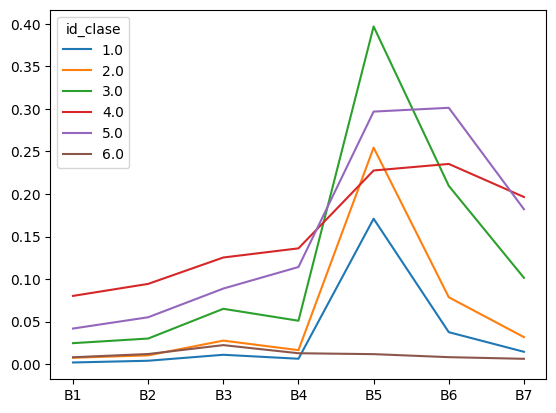

In [28]:
sitios_mean.transpose().plot() ## Como podemos modificar la Leyenda para colocar los nombre de las categorias.


<Axes: >

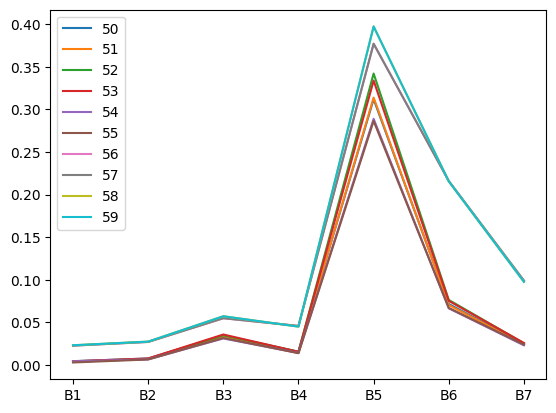

In [30]:
## Scatterplot para ver las firmas espectrales
sitios.iloc[50:60,4:].transpose().plot()

array([[<Axes: title={'center': 'B1'}>, <Axes: title={'center': 'B2'}>,
        <Axes: title={'center': 'B3'}>],
       [<Axes: title={'center': 'B4'}>, <Axes: title={'center': 'B5'}>,
        <Axes: title={'center': 'B6'}>],
       [<Axes: title={'center': 'B7'}>, <Axes: >, <Axes: >]], dtype=object)

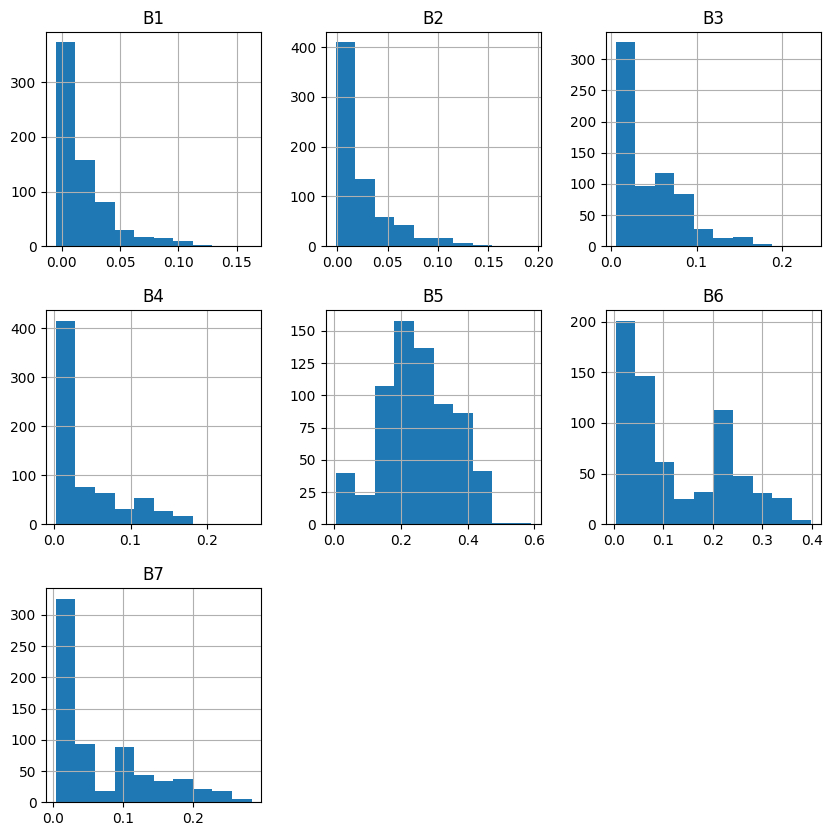

In [34]:
(sitios.loc[:,['B1','B2','B3','B4','B5','B6', 'B7']]).hist(figsize=(10,10))

<Axes: xlabel='B1', ylabel='B5'>

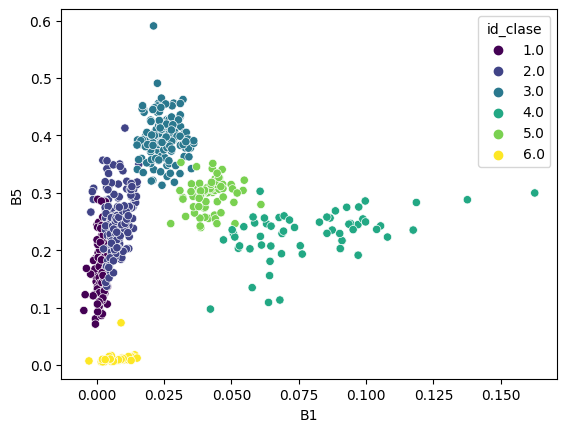

In [35]:
sns.scatterplot(sitios, x = 'B1', y = 'B5', hue = 'id_clase', palette="viridis")

In [36]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
#%matplotlib inline

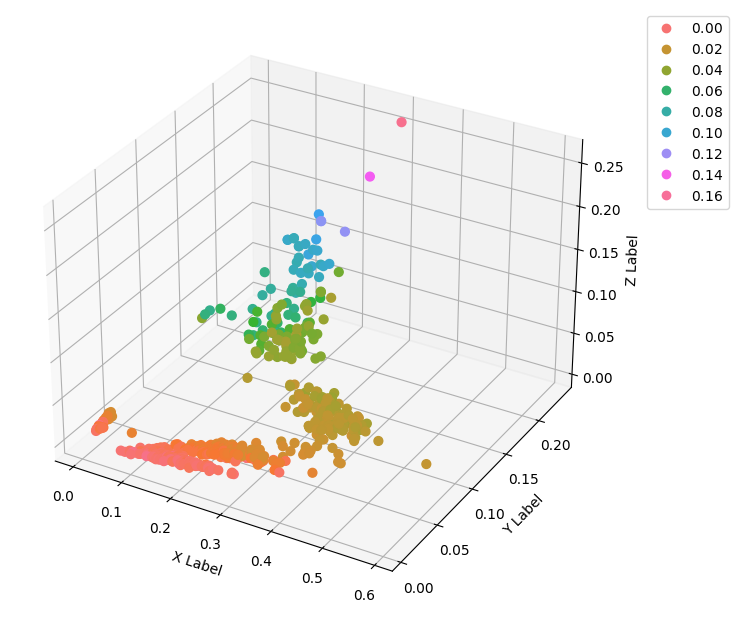

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap


# Create a new figure
fig = plt.figure(figsize=(6,6))

# Add a 3D subplot
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# Get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 160).as_hex())

# Create a scatter plot
sc = ax.scatter(sitios['B5'], sitios['B3'], sitios['B4'], s=40, c= sitios['B1'], marker='o', cmap=cmap, alpha=1)

# Set labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Create a legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# Show the plot
plt.show()

In [66]:
# Ahora vamos a hacer los graficos interactivos usando plotly



<Axes: >

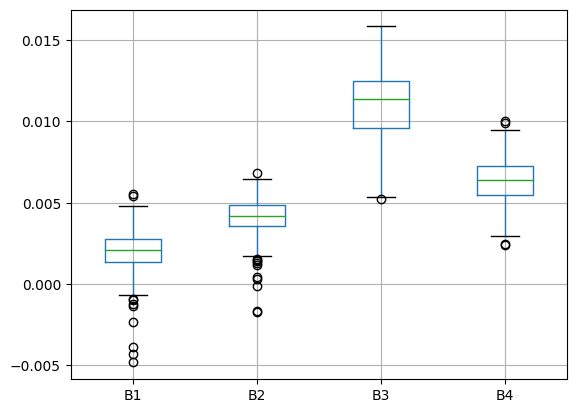

In [41]:
### Vamos a filtrar por categoria

sitios_gr.query('id_clase == 1').iloc[:,1:5
                            ].boxplot()




<Axes: >

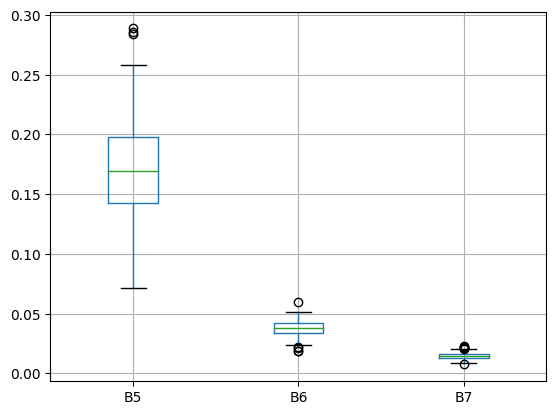

In [52]:
sitios_gr.query('id_clase == 1').iloc[:,5:8
                            ].boxplot()


<Axes: >

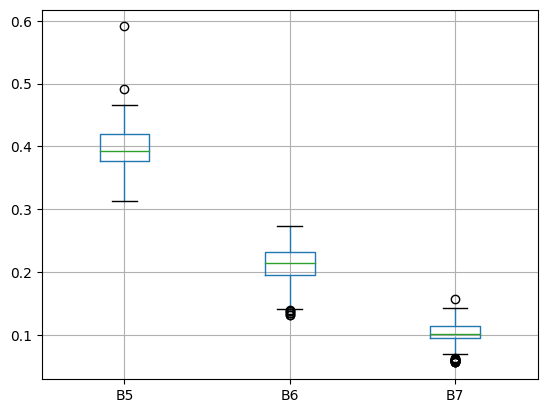

In [57]:
sitios_gr.query('id_clase == 3').iloc[:,5:8
                            ].boxplot()

<Axes: >

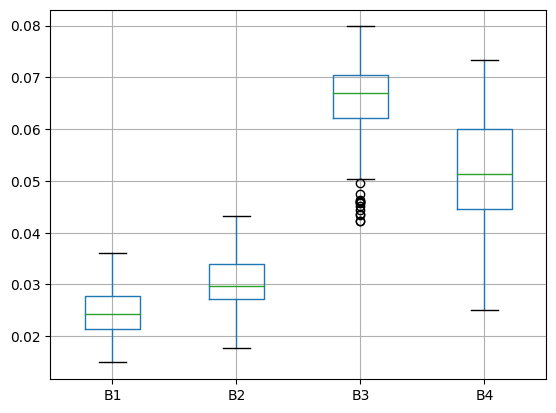

In [58]:
sitios_gr.query('id_clase == 3').iloc[:,1:5
                            ].boxplot()

<Axes: >

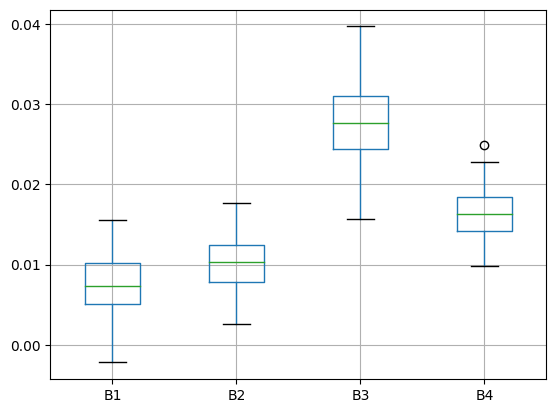

In [59]:
sitios_gr.query('id_clase == 2').iloc[:,1:5
                            ].boxplot()

<Axes: >

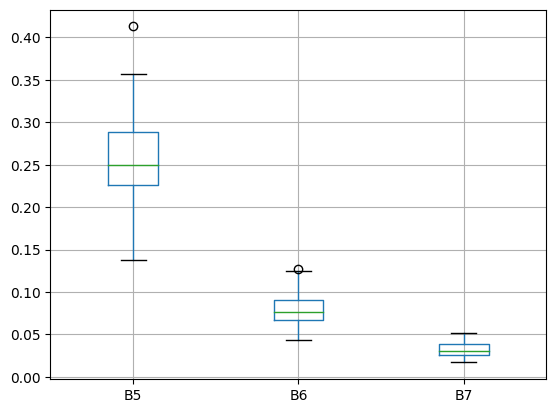

In [60]:
sitios_gr.query('id_clase == 2').iloc[:,5:8
                            ].boxplot()

<Axes: >

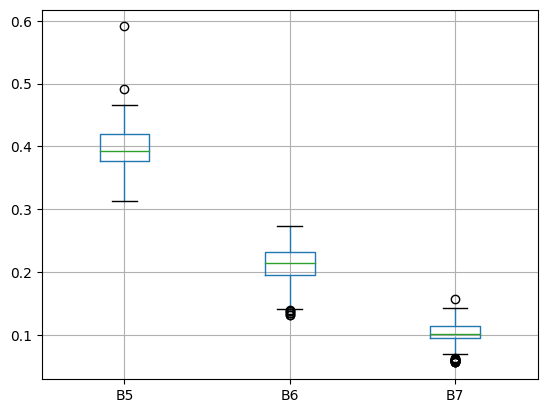

In [61]:
sitios_gr.query('id_clase == 3').iloc[:,5:8
                            ].boxplot()

# Vamos a hacer los graficos interactivos de plotly

In [62]:
import plotly.express as px